In [17]:
import seaborn as sns
import datetime as dt
import yfinance as yf
from ta.volatility import BollingerBands
from sklearn.linear_model import LinearRegression

In [4]:
btc = yf.Ticker("BTC-USD")

# Train Dataset

In [5]:
trainStartDate = dt.datetime(2009,1,1)
trainEndDate = dt.datetime(2021,1,1)
btcTrain = btc.history(start=trainStartDate, end=trainEndDate)

trainBollinger = BollingerBands(close=btcTrain["Close"], window=20, window_dev=2)

btcTrain['bb_bbm'] = trainBollinger.bollinger_mavg()
btcTrain['bb_bbh'] = trainBollinger.bollinger_hband()
btcTrain['bb_bbl'] = trainBollinger.bollinger_lband()

closeTrainX = btcTrain[["Close"]]
trainBollingerY = btcTrain["bb_bbm"].dropna()

## Basit Lineer Regresyon

In [6]:
reg = LinearRegression()
model = reg.fit(closeTrainX[19:], trainBollingerY)

# Test Dataset

In [7]:
#prepare test
testStartDate = dt.datetime(2021,1,1)
testEndDate = dt.datetime(2022,1,1)
btcTest = btc.history(start=testStartDate, end=testEndDate)
testBollinger = BollingerBands(close=btcTest["Close"], window=20, window_dev=2)
btcTest['bb_bbm'] = testBollinger.bollinger_mavg()
btcTest['bb_bbh'] = testBollinger.bollinger_hband()
btcTest['bb_bbl'] = testBollinger.bollinger_lband()

## Test

In [8]:
testResults = []
for i in range(btcTest['bb_bbm'].dropna().size):
    testResults.append(model.predict([[(btcTest['bb_bbm'].dropna().iloc[i])]])[0])

## Görselleştirme

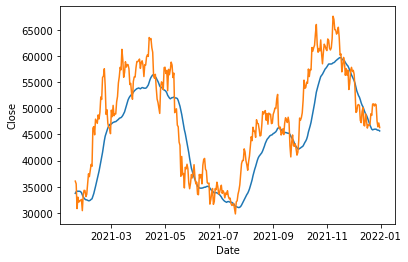

In [9]:
sns.lineplot(x = btcTest['bb_bbm'].dropna().index, y = testResults), sns.lineplot(x = btcTest["Close"][19:].index, y = btcTest["Close"][19:]);

## Yüzde Testi

In [19]:
errorTotal = 0
for i in range(btcTest['bb_bbm'].dropna().size):
    errorTotal += abs((btcTest["Close"][19+i] * 100 / testResults[i])-100)
error = errorTotal/(i+1)
error

9.760364582507348